In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Load the Excel file (replace 'your_file.xlsx' with the path to your file)
data = pd.read_csv(r"C:\Users\65963\DIS.US_M5.csv")

In [2]:
data.shape

(103633, 6)

In [3]:
from IPython.display import display
display(data)

datetime    open    high     low   close  volume
0       2018-12-07 19:25:00  112.40  112.45  112.24  112.34   59188
1       2018-12-07 19:30:00  112.33  112.35  112.20  112.30   59717
2       2018-12-07 19:35:00  112.28  112.29  112.16  112.17  278769
3       2018-12-07 19:40:00  112.18  112.22  112.00  112.12   52958
4       2018-12-07 19:45:00  112.14  112.25  112.01  112.03   40215
...                     ...     ...     ...     ...     ...     ...
103628  2024-03-13 22:40:00  112.60  112.68  112.53  112.64   72735
103629  2024-03-13 22:45:00  112.64  112.80  112.60  112.75   89032
103630  2024-03-13 22:50:00  112.74  112.77  112.53  112.65  118826
103631  2024-03-13 22:55:00  112.65  112.67  112.46  112.49  373721
103632  2024-03-13 23:00:00  112.51  112.55  112.46  112.50  767591

[103633 rows x 6 columns]

In [4]:
print(data.columns)

Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [5]:
print("Missing values in the entire DataFrame:")
print(data.isnull().sum())

# Check if any missing values are present
print("\nAre there any missing values in the DataFrame?")
print(data.isnull().any().any())

Missing values in the entire DataFrame:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Are there any missing values in the DataFrame?
False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103633 entries, 0 to 103632
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  103633 non-null  object 
 1   open      103633 non-null  float64
 2   high      103633 non-null  float64
 3   low       103633 non-null  float64
 4   close     103633 non-null  float64
 5   volume    103633 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.7+ MB


In [7]:
# Convert 'date' column to datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
# Check the data type again
print(data.dtypes)

datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
dtype: object


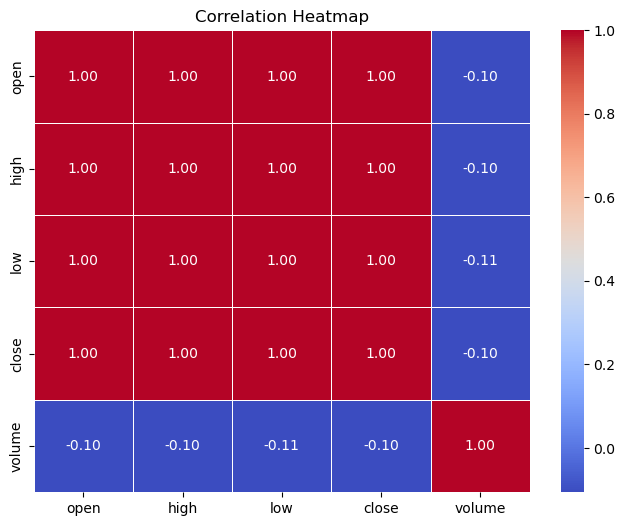

In [9]:
# Calculate correlation matrix
corr_matrix = data[['open', 'high', 'low', 'close', 'volume']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
correlation_matrix = data[['open', 'high', 'low', 'close','volume']].corr()
print(correlation_matrix)

            open      high       low     close    volume
open    1.000000  0.999969  0.999984  0.999958 -0.104605
high    0.999969  1.000000  0.999955  0.999984 -0.103166
low     0.999984  0.999955  1.000000  0.999970 -0.106028
close   0.999958  0.999984  0.999970  1.000000 -0.104671
volume -0.104605 -0.103166 -0.106028 -0.104671  1.000000


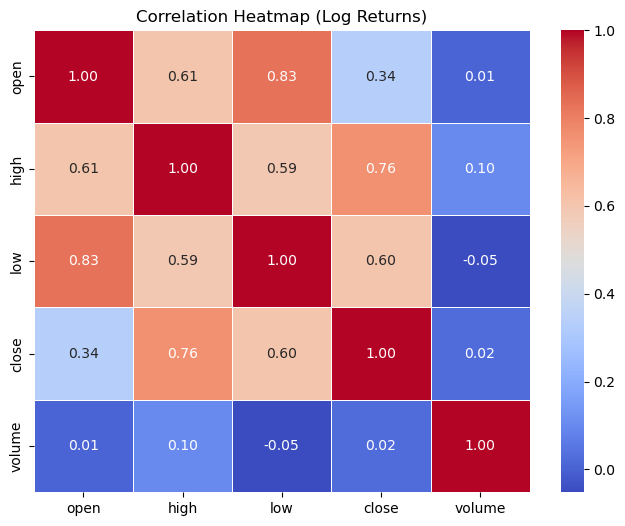

In [11]:
# Calculate log returns
data_log_returns = np.log(data[['open', 'high', 'low', 'close', 'volume']] / data[['open', 'high', 'low', 'close', 'volume']].shift(1))

# Drop NaN values introduced by shift
data_log_returns = data_log_returns.dropna()

# Calculate correlation matrix for log returns
corr_matrix = data_log_returns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap (Log Returns)')
plt.show()

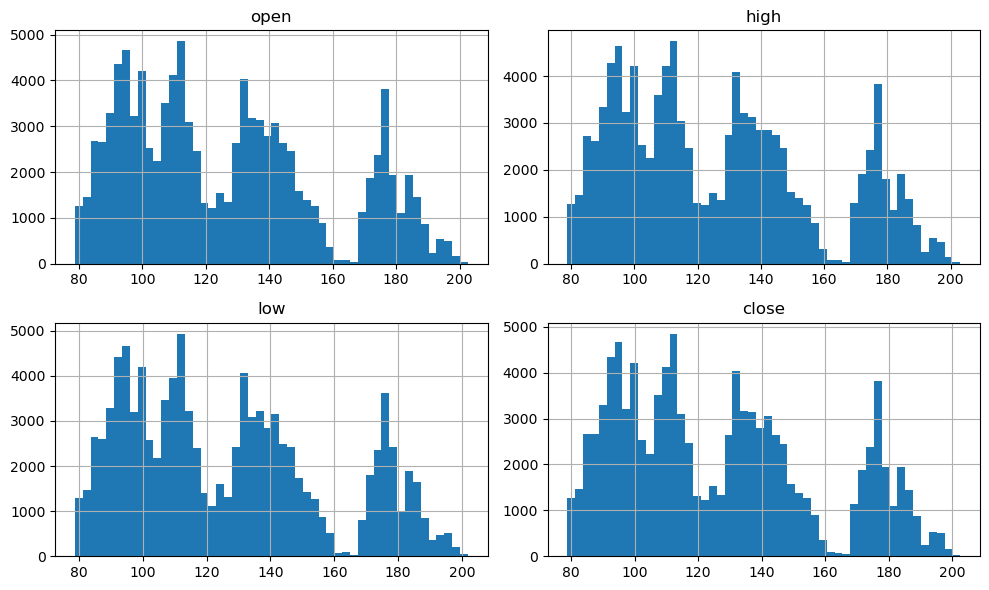

In [12]:
# Plot histograms for 'open', 'high', 'low', 'close'
data[['open', 'high', 'low', 'close']].hist(bins=50, figsize=(10, 6))
plt.tight_layout()
plt.show()

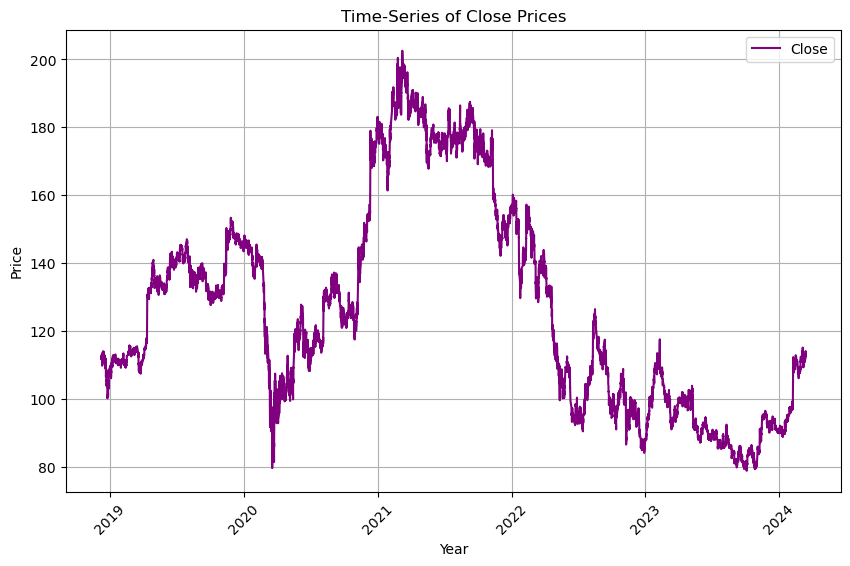

In [13]:
df = pd.DataFrame(data)
df["datetime"] = pd.to_datetime(df["datetime"])

# Set datetime as index
df.set_index('datetime', inplace=True)

# 1. Time-Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Close', color='purple')
plt.title('Time-Series of Close Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

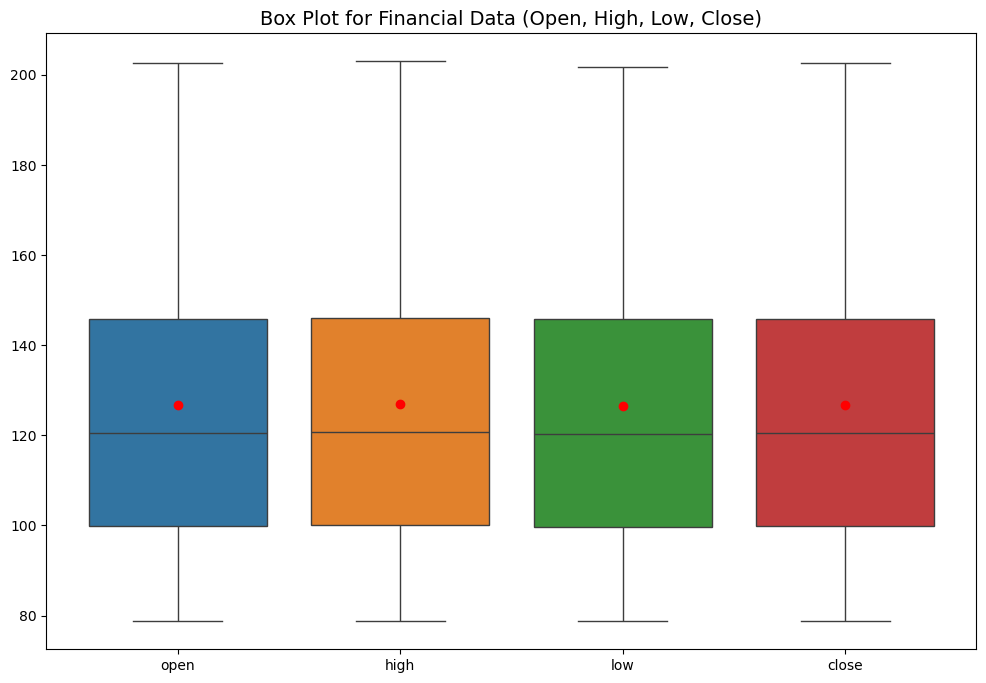

In [14]:
# 1. Box plot for all individual columns to detect outliers and display mean
plt.figure(figsize=(12, 8))  # Adjust the size of the plot for better visualization

# Create the box plot for multiple columns
sns.boxplot(data=data[['open', 'high', 'low', 'close']], showfliers=True)

# Title for the plot
plt.title('Box Plot for Financial Data (Open, High, Low, Close)', fontsize=14)

# Calculate and plot the mean values for each feature
means = data[['open', 'high', 'low', 'close']].mean()

# Overlay mean points on the boxplot
for i, feature in enumerate(data[['open', 'high', 'low', 'close']].columns):
    plt.scatter(i, means[feature], color='red', label=f'Mean - {feature}' if i == 0 else "", zorder=5)

# Show the plot
plt.show()

In [15]:
df = pd.DataFrame(data)

# Features and target
X = df[['open', 'high', 'low', 'volume']]  # Features
y = df['close']  # Target (Label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.07398158923143759
Mean Squared Error (MSE): 0.04010605534761427
Root Mean Squared Error (RMSE): 0.20026496285574835
R-squared (R²): 0.9999587384569913


In [16]:
df = pd.DataFrame(data)

# Features and target
X = df[['open', 'high', 'low', 'volume']]  # Features
y = df['close']  # Target (Label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.06415879027773523
Mean Squared Error (MSE): 0.013169061820187922
Root Mean Squared Error (RMSE): 0.1147565327996098
R-squared (R²): 0.9999864515269336


=== Cross-Validation Results ===
Cross-Validation Mean Absolute Error (MAE): 0.06424737460434801
Cross-Validation Mean Squared Error (MSE): 0.011215067583434737
Cross-Validation Root Mean Squared Error (RMSE): 0.10022182848315589
Cross-Validation R²: 0.9999524839474055

=== Test Set Results ===
Test Mean Absolute Error (MAE): 0.06415879027773523
Test Mean Squared Error (MSE): 0.013169061820187922
Test Root Mean Squared Error (RMSE): 0.1147565327996098
Test R-squared (R²): 0.9999864515269336


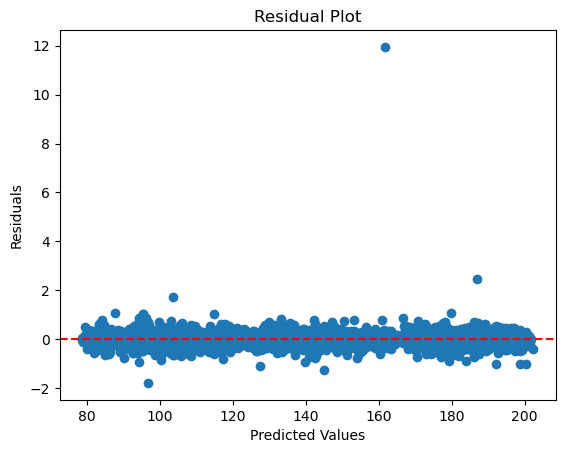


The model seems to be a good fit. The RMSE and R² values for test and cross-validation are similar.


In [17]:
# Assuming `data` is already defined
df = pd.DataFrame(data)

# Features and target
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Linear Regression model
lr = LinearRegression()

# Define custom scoring functions for cross-validation
scoring = {
    'mae': 'neg_mean_absolute_error',  # Negative because MAE is minimized
    'mse': 'neg_mean_squared_error',  # Negative because MSE is minimized
    'rmse': 'neg_root_mean_squared_error',  # RMSE is the square root of MSE
    'r2': 'r2'  # R² is maximized, so no negation
}

# Perform Cross-validation (using 5 folds)
cv_results = cross_validate(lr, X, y, cv=5, scoring=scoring, return_train_score=True)

# Calculate mean metrics across folds
mae_cv = -np.mean(cv_results['test_mae'])  # Negate because MAE is minimized
mse_cv = -np.mean(cv_results['test_mse'])  # Negate because MSE is minimized
rmse_cv = -np.mean(cv_results['test_rmse'])  # Negate because RMSE is minimized
r2_cv = np.mean(cv_results['test_r2'])  # R² is not negated as higher values are better

# Print the cross-validation results
print("=== Cross-Validation Results ===")
print(f"Cross-Validation Mean Absolute Error (MAE): {mae_cv}")
print(f"Cross-Validation Mean Squared Error (MSE): {mse_cv}")
print(f"Cross-Validation Root Mean Squared Error (RMSE): {rmse_cv}")
print(f"Cross-Validation R²: {r2_cv}")

# Train the model on the entire training set
lr.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = lr.predict(X_test)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the results for the test set
print("\n=== Test Set Results ===")
print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Test R-squared (R²): {r2_test}")

# Residuals (difference between true and predicted values)
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Assess overfitting, underfitting, or good fit based on RMSE and R²
if rmse_test < rmse_cv and r2_test > r2_cv:
    print("\nThe model might be overfitting. The test RMSE is higher, and test R² is lower than cross-validation.")
elif rmse_test > rmse_cv and r2_test < r2_cv:
    print("\nThe model might be underfitting. The cross-validation RMSE is higher, and cross-validation R² is lower than test set.")
else:
    print("\nThe model seems to be a good fit. The RMSE and R² values for test and cross-validation are similar.")

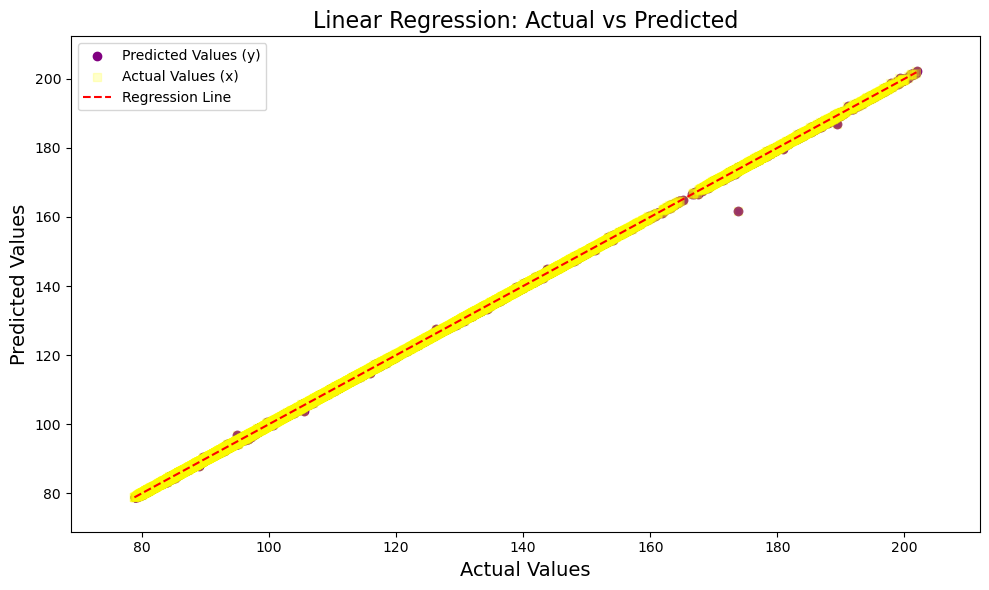

In [18]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(10, 6))

# Add some jitter to separate the points
jitter_strength = 0.05

# Scatter plot for predicted values (y-axis) in blue
plt.scatter(y_test + jitter_strength, y_pred, color='purple', label='Predicted Values (y)', alpha=1.0, marker='o')

# Scatter plot for actual values (x-axis) in yellow (with different marker)
plt.scatter(y_test - jitter_strength, y_pred, color='yellow', label='Actual Values (x)', alpha=0.2, marker='s')

# Plot a line y = x for reference (perfect predictions would fall on this line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regression Line')

# Adjust the plot limits to spread out the data
plt.xlim([y_test.min() - 10, y_test.max() + 10])  # Adjust the x-axis range
plt.ylim([y_pred.min() - 10, y_pred.max() + 10])  # Adjust the y-axis range

# Labels and title
plt.title('Linear Regression: Actual vs Predicted', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [20]:
# Load the saved model
loaded_model = joblib.load('linear_regression_model.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [21]:
# Replace these with actual values for the predict's features
predict_features = [[150, 180, 120, 159188]]

# Create a DataFrame with the same feature names as the training data
predict_features_df = pd.DataFrame(predict_features, columns=['open', 'high', 'low', 'volume'])

# Predict the close price
predict_close = loaded_model.predict(predict_features_df)

print(f"Predicted future Close Price: {predict_close[0]}")

Predicted future Close Price: 149.44937223090562


In [1]:
"""
Data preperation:
    1. clean up text
    2. tokenize text
    3. summarise using pre-trained model
    4. grade sentiment level using pretrained model
    5. combine news's sentiment score with stocks price score
"""

# !pip install yfinance
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# !pip install ipywidgets
# jupyter nbextension enable --py widgetsnbextension
# !pip install vaderSentiment

import os
from transformers import pipeline
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np

from tqdm import tqdm

os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

news_data = pd.read_csv(r"C:\Users\Zhun Kai\Downloads\news_data.csv", encoding="latin1")
stock_data=pd.read_csv(r"C:\Users\Zhun Kai\Downloads\DIS.US_M5.csv")
news_data['news content']=news_data['news content'].astype(str)
news_data = news_data.dropna()

import os
import pandas as pd
from transformers import pipeline
import numpy as np
from tqdm import tqdm

# Suppress symlink warnings
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Initialize the summarization pipeline (device=-1 for CPU)
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=0)

# Ensure 'datetime' is a proper datetime column
print("Converting 'datetime' column to datetime format...")
news_data['datetime'] = pd.to_datetime(news_data['datetime'], errors='coerce')

# Extract unique dates
print("Extracting unique dates...")
unique_dates = news_data['datetime'].dropna().unique()
print(f"Found {len(unique_dates)} unique dates.")

# Initialize a dictionary to store summaries by date
summaries_by_date = {}

# Summarize news content and align summaries to their respective dates
print("Summarizing news content by date...")
for date in tqdm(unique_dates, desc="Processing Dates"):
    try:
        # Filter news content for the specific date
        news_on_date = news_data[news_data['datetime'] == date]['news content']
        # Concatenate all news content for the date
        concatenated_news = " ".join(news_on_date.dropna())
        
        # Skip if there's no content for the date
        if not concatenated_news.strip():
            summaries_by_date[date] = "No news content available for this date."
            continue

        # Summarize the concatenated news
        input_length = len(concatenated_news.split())
        adjusted_max_length = max(10, int(input_length * 0.5))  # Ensure at least 10 words in the summary
        summary = summarizer(concatenated_news, min_length=10, max_length=adjusted_max_length, truncation=True)
        summaries_by_date[date] = summary[0]['summary_text']
    except Exception as e:
        summaries_by_date[date] = f"Error summarizing news: {str(e)}"
        print(f"Error processing date {date}: {e}")

# Initialize the 'summary' column with NaN and set its type to object (compatible with strings)
print("Initializing 'summary' column in the DataFrame...")
news_data['summary'] = np.nan
news_data['summary'] = news_data['summary'].astype('object')  # Ensure compatibility for strings

# Populate summaries for matching dates
print("Populating summaries into the DataFrame...")
for idx, row in tqdm(news_data.iterrows(), total=len(news_data), desc="Populating Summaries"):
    try:
        date = row['datetime']
        if date in summaries_by_date:
            news_data.at[idx, 'summary'] = summaries_by_date[date]  # Assign the summary
    except Exception as e:
        print(f"Error populating summary for row {idx}: {e}")

# Display the updated DataFrame
print("Processing complete. Displaying updated DataFrame:")
print(news_data.head())

"""
This block calculates the polarity score,
neg -> negativity of text
neu -> neutrality of text
pos -> positivity of text
compund -> overall sentiment score for text

How to Interpret (see comp):
Positive Sentiment: If the compound score is positive, the text is generally perceived as positive in tone.
Negative Sentiment: If the compound score is negative, the text is perceived as negative.
Neutral Sentiment: If the compound score is close to zero, the text is neither clearly positive nor negative, indicating neutrality.
"""

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure 'summary' is a string and handle NaN values
news_data['summary'] = news_data['summary'].fillna("").astype(str)

# Analyze sentiment for each summary and store results in a new column
tqdm.pandas(desc="Analyzing Sentiment")
news_data['sentiment_score'] = news_data['summary'].progress_apply(lambda x: analyzer.polarity_scores(x))

# Separate the sentiment scores into individual columns (optional)
news_data['neg'] = news_data['sentiment_score'].apply(lambda x: x['neg'])
news_data['neu'] = news_data['sentiment_score'].apply(lambda x: x['neu'])
news_data['pos'] = news_data['sentiment_score'].apply(lambda x: x['pos'])
news_data['compound'] = news_data['sentiment_score'].apply(lambda x: x['compound'])

# Display results
# print(news_data[['summary', 'neg', 'neu', 'pos', 'compound']].head())

# Ensure both datetime columns are in datetime format, datetime64 format
stock_data['datetime'] = pd.to_datetime(stock_data['datetime'], format='%Y-%m-%d %H:%M:%S')
news_data['datetime'] = pd.to_datetime(news_data['datetime'], errors='coerce')
stock_data['date'] = stock_data['datetime'].dt.date
news_data['date'] = pd.to_datetime(news_data['datetime']).dt.date

# Merge the dataframes with a left join on 'datetime'
merged_data = pd.merge(stock_data, news_data, on='date', how='left')

# Replace missing sentiment scores with defaults
merged_data['cleaned_neg'] = merged_data['neg'].fillna(0)
merged_data['cleaned_neu'] = merged_data['neu'].fillna(1)
merged_data['cleaned_pos'] = merged_data['pos'].fillna(0)
merged_data['cleaned_compound'] = merged_data['compound'].fillna(0)

print(merged_data.columns)

Device set to use cpu


Converting 'datetime' column to datetime format...
Extracting unique dates...
Found 115 unique dates.
Summarizing news content by date...


Processing Dates: 100%|██████████████████████████████████████████████████████████████| 115/115 [07:47<00:00,  4.06s/it]


Initializing 'summary' column in the DataFrame...
Populating summaries into the DataFrame...


Populating Summaries: 100%|███████████████████████████████████████████████████████| 124/124 [00:00<00:00, 10763.97it/s]


Processing complete. Displaying updated DataFrame:
    datetime                                       news content  \
0 2018-12-19  NEW YORK (REUTERS) - Filmmaker George Lucas' S...   
1 2018-12-25  LOS ANGELES  Jason Momoa's Aquaman is the Kin...   
2 2018-12-28  In this animated film, gifted teen Miles Moral...   
3 2019-01-05  LOS ANGELES  The last instalment of the Pirat...   
4 2019-01-07  LOS ANGELES (AFP) - Aquaman left other movies ...   

                                             summary  
0   George Lucas' Star Wars empire planted him fi...  
1   The DC adventure dominated in North America w...  
2   In this animated film, gifted teen Miles Mora...  
3   Johnny Depp reportedly received up to US$128 ...  
4   Aquaman left other movies in its wake in Nort...  


Analyzing Sentiment: 100%|█████████████████████████████████████████████████████████| 124/124 [00:00<00:00, 8156.93it/s]

Index(['datetime_x', 'open', 'high', 'low', 'close', 'volume', 'date',
       'datetime_y', 'news content', 'summary', 'sentiment_score', 'neg',
       'neu', 'pos', 'compound', 'cleaned_neg', 'cleaned_neu', 'cleaned_pos',
       'cleaned_compound'],
      dtype='object')


R² Score: 0.007390553542964806
          Coefficient
neg         40.523655
neu          0.453203
pos          8.744981
compound    18.096001


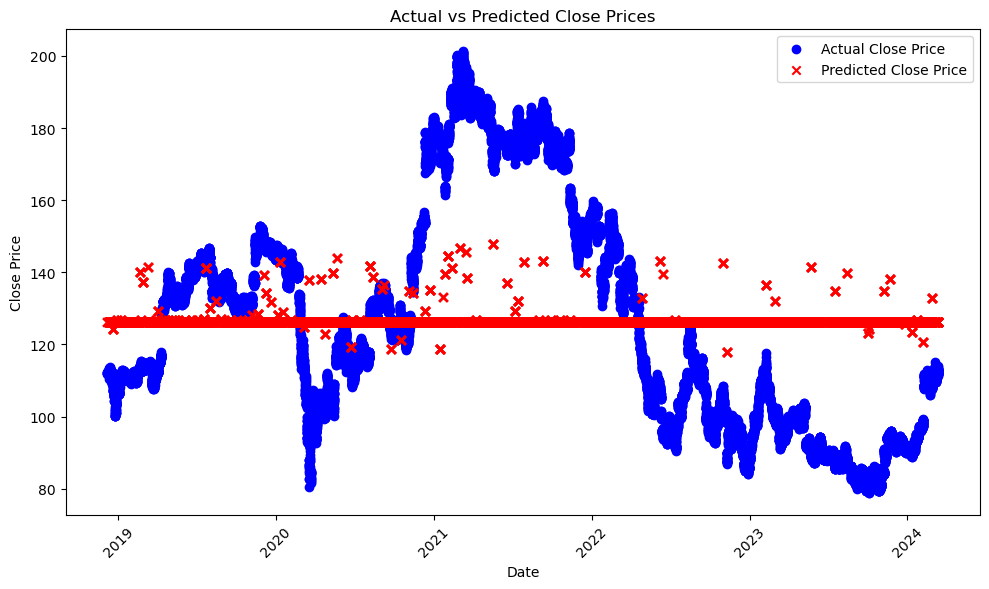

R² Score: 0.8255100660888339
R² Score (Ridge): 0.07190962908339504
R² Score (Filtered Data): 0.8255100660888339


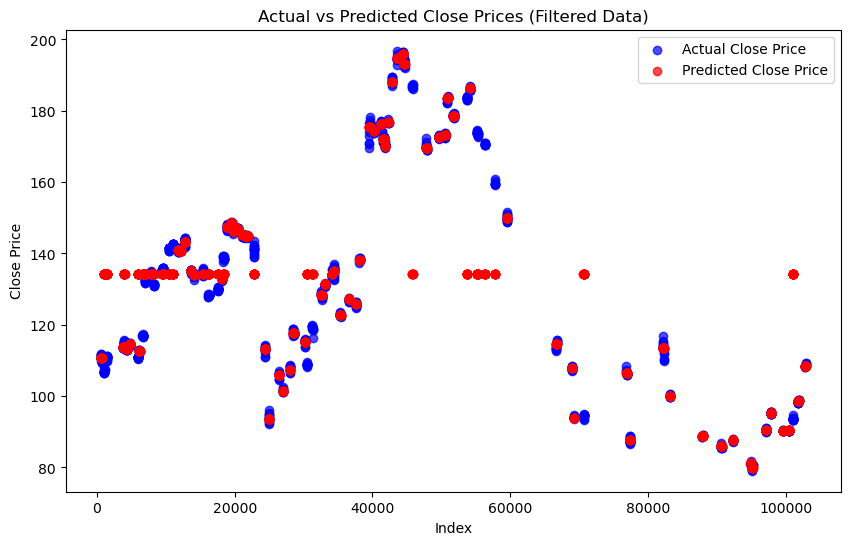

    Feature  Importance
3  compound    0.488737
1       neu    0.210706
0       neg    0.179428
2       pos    0.121128


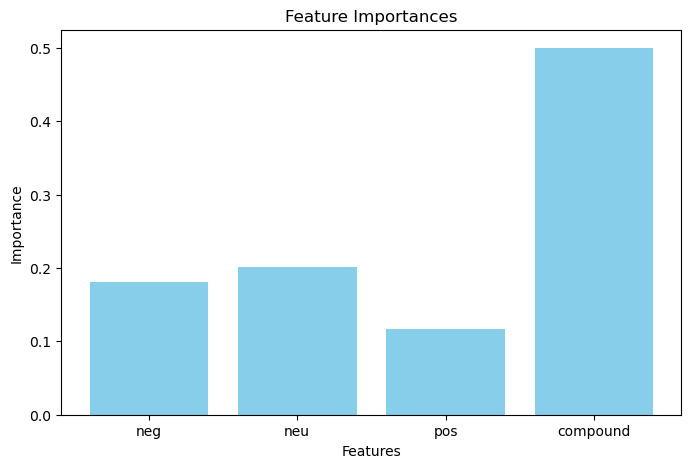

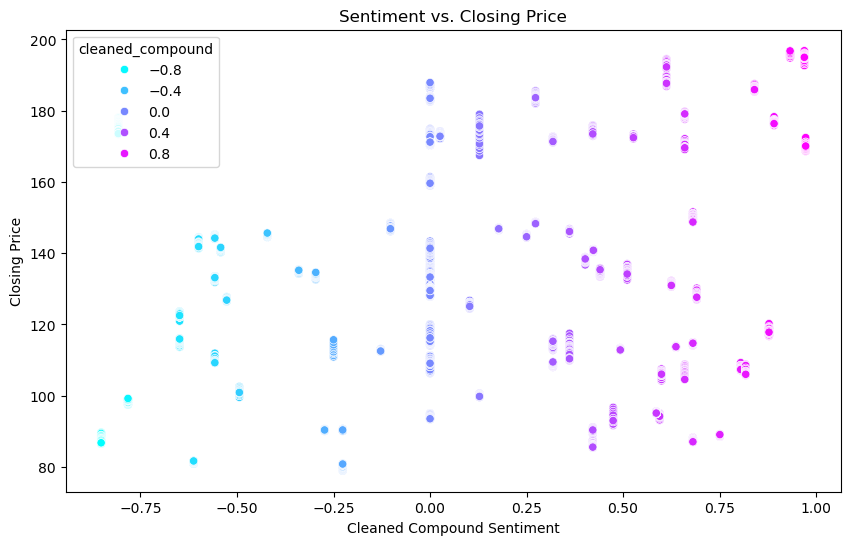

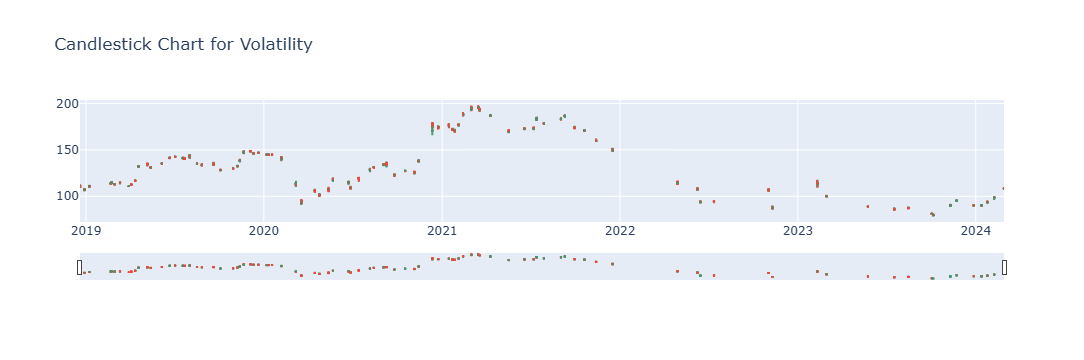

C:\Users\Zhun Kai\AppData\Local\Temp\ipykernel_6680\1393792521.py:198: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




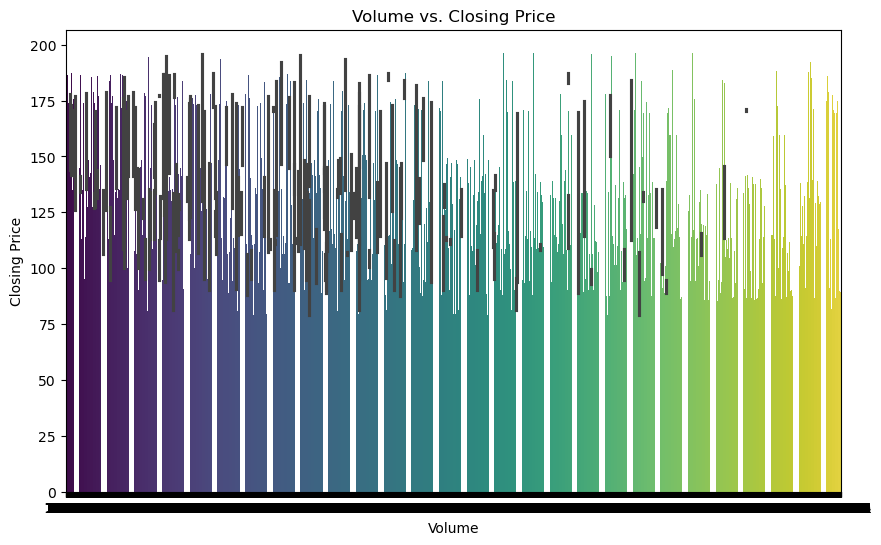

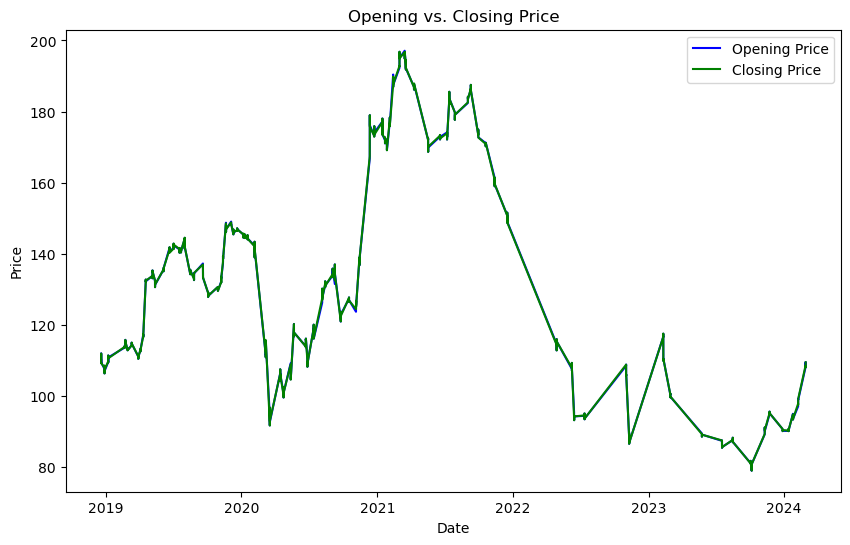

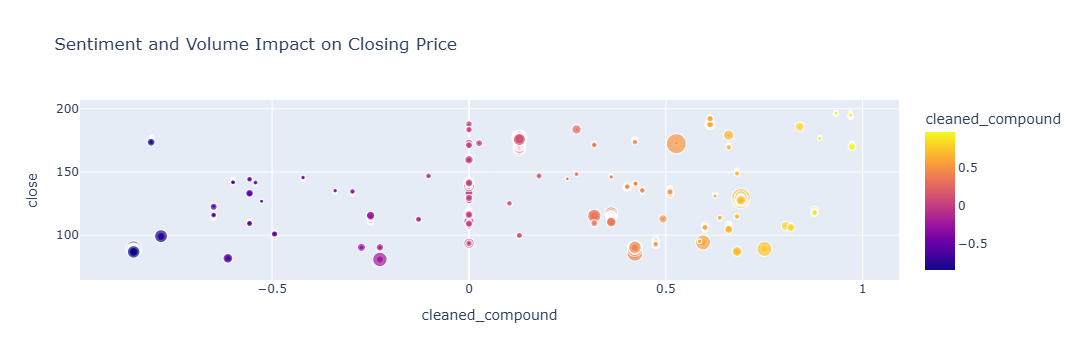

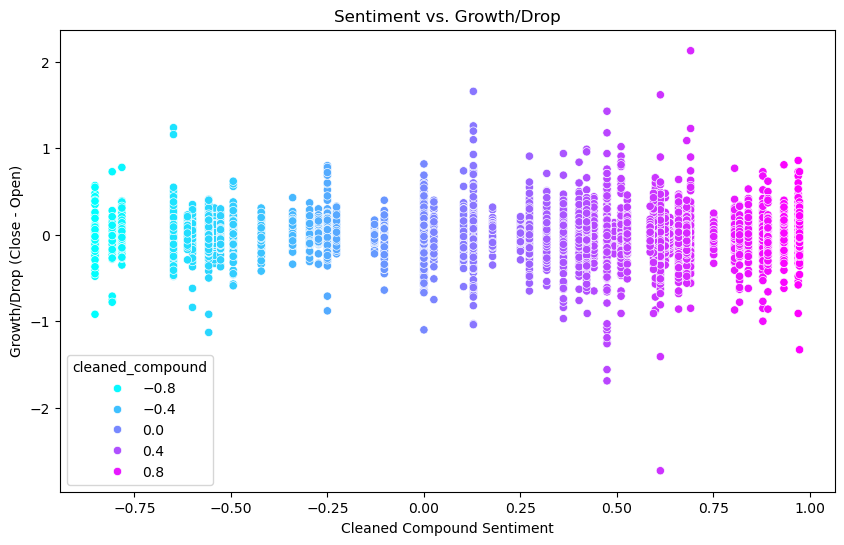

C:\Users\Zhun Kai\AppData\Local\Temp\ipykernel_6680\1393792521.py:233: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




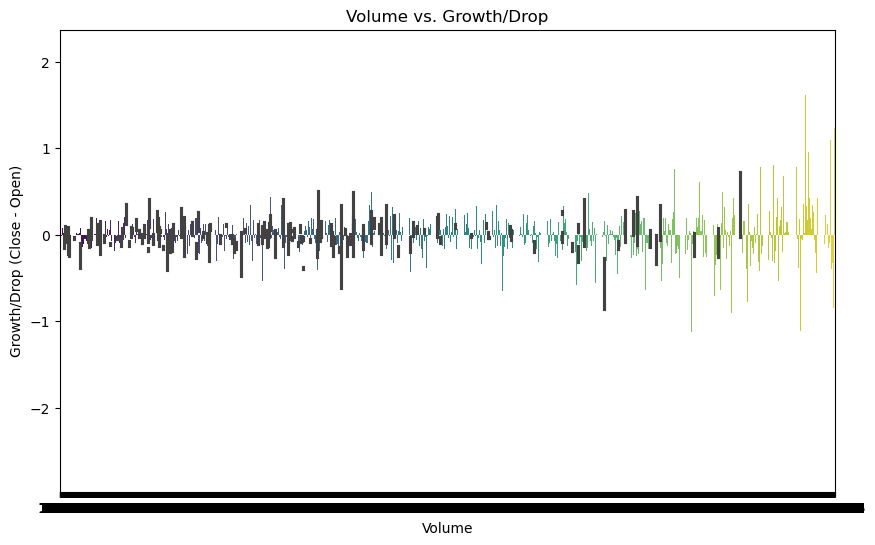

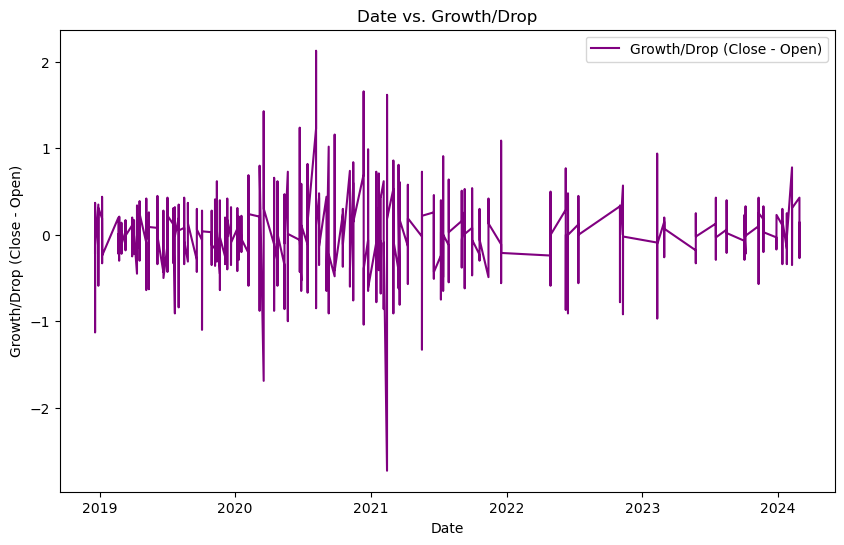

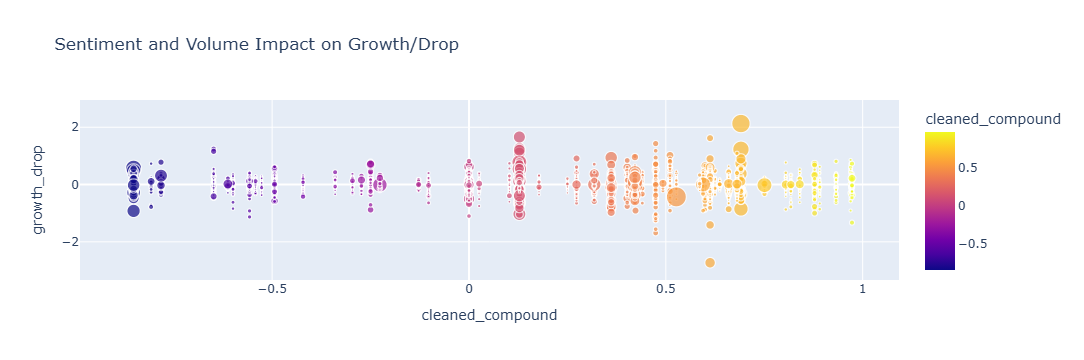

In [2]:
"""
prediction of stock price with sentiment result

displaying it in graph
"""

from sklearn.model_selection import train_test_split

X = merged_data[['neg', 'neu', 'pos', 'compound']]  # Features
y = merged_data['close']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming merged_data contains the sentiment scores (neg, neu, pos, compound) and close price

# Ensure 'datetime' is in datetime format (if not already)
merged_data['datetime'] = pd.to_datetime(merged_data['datetime_x'], errors='coerce')

# Extract only the date (no time)
merged_data['date'] = merged_data['datetime'].dt.date

# Prepare the features (sentiment scores) and target (close price)
features = merged_data[['neg', 'neu', 'pos', 'compound']]
target = merged_data['close']

# Handle missing values (replace NaN values with 0 for sentiment and 0 for close price)
features = features.fillna(0)
target = target.fillna(0)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate R² score to see how much variation is explained by the sentiment scores
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")

# Print feature coefficients to understand feature importance
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)

# Use the 'date' column for plotting (and align it with the test set)
X_test['date'] = merged_data.loc[X_test.index, 'date']

# Visualize the actual vs predicted close prices using scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for actual close prices
plt.scatter(X_test['date'], y_test, label='Actual Close Price', color='blue', marker='o')

# Scatter plot for predicted close prices
plt.scatter(X_test['date'], predictions, label='Predicted Close Price', color='red', marker='x')

# Format the plot
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Feature engineering: Add rolling averages or lagged features
merged_data['neg_rolling_avg'] = merged_data['neg'].rolling(window=3).mean()
merged_data['compound_lag'] = merged_data['compound'].shift(1)

# Drop rows with missing values
merged_data.dropna(subset=['neg_rolling_avg', 'compound_lag'], inplace=True)

# Define the features and target variable
features = ['neg', 'neu', 'pos', 'compound', 'neg_rolling_avg', 'compound_lag']
X = merged_data[features]
y = merged_data['close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Extra: Ridge regression:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score (Ridge): {r2_ridge}")

# Assuming merged_data contains sentiment scores and close prices
# Filter the data to only include rows where sentiment data is present (no NaN values)
filtered_data = merged_data.dropna(subset=['neg', 'neu', 'pos', 'compound'])

# Define features (sentiment scores) and target (close price)
features = ['neg', 'neu', 'pos', 'compound']
X = filtered_data[features]
y = filtered_data['close']

# Split the filtered data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Filtered Data): {r2}")

# Plot the actual vs. predicted close prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Actual Close Price', alpha=0.7)
plt.scatter(X_test.index, y_pred, color='red', label='Predicted Close Price', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Filtered Data)')
plt.legend()
plt.show()

importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

import matplotlib.pyplot as plt

# Plot feature importances
features = ['neg', 'neu', 'pos', 'compound']
importances = [0.180824, 0.201796, 0.117511, 0.499869]

plt.figure(figsize=(8, 5))
plt.bar(features, importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Load your dataset
data = merged_data

# (a) Sentiment vs. Closing Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['cleaned_compound'], y=data['close'], hue=data['cleaned_compound'], palette='cool')
plt.title('Sentiment vs. Closing Price')
plt.xlabel('Cleaned Compound Sentiment')
plt.ylabel('Closing Price')
plt.show()

# (b) Volatility Patterns (Candlestick Chart)
fig = go.Figure(data=[go.Candlestick(
    x=data['datetime_x'],
    open=data['open'],
    high=data['high'],
    low=data['low'],
    close=data['close']
)])
fig.update_layout(title='Candlestick Chart for Volatility')
fig.show()

# (c) Volume vs. Closing Price
plt.figure(figsize=(10, 6))
sns.barplot(x=data['volume'], y=data['close'], palette='viridis')
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

# (d) Opening vs. Closing Price
plt.figure(figsize=(10, 6))
plt.plot(data['datetime_x'], data['open'], label='Opening Price', color='blue')
plt.plot(data['datetime_x'], data['close'], label='Closing Price', color='green')
plt.title('Opening vs. Closing Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# (e) Sentiment and Volume Impact
fig = px.scatter(data, x='cleaned_compound', y='close', size='volume', color='cleaned_compound',
                 title='Sentiment and Volume Impact on Closing Price')
fig.show()

# Calculate Growth/Drop
# Positive if growth (close > open), negative if drop (close < open)
data['growth_drop'] = data['close'] - data['open']

# (f) Sentiment vs. Growth/Drop
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['cleaned_compound'], y=data['growth_drop'], hue=data['cleaned_compound'], palette='cool')
plt.title('Sentiment vs. Growth/Drop')
plt.xlabel('Cleaned Compound Sentiment')
plt.ylabel('Growth/Drop (Close - Open)')
plt.show()

# (g) Volume vs. Growth/Drop
plt.figure(figsize=(10, 6))
sns.barplot(x=data['volume'], y=data['growth_drop'], palette='viridis')
plt.title('Volume vs. Growth/Drop')
plt.xlabel('Volume')
plt.ylabel('Growth/Drop (Close - Open)')
plt.show()

# (h) Opening vs. Growth/Drop
plt.figure(figsize=(10, 6))
plt.plot(data['datetime_x'], data['growth_drop'], label='Growth/Drop (Close - Open)', color='purple')
plt.title('Date vs. Growth/Drop')
plt.xlabel('Date')
plt.ylabel('Growth/Drop (Close - Open)')
plt.legend()
plt.show()

# (i) Sentiment and Volume Impact on Growth/Drop
fig = px.scatter(data, x='cleaned_compound', y='growth_drop', size='volume', color='cleaned_compound',
                 title='Sentiment and Volume Impact on Growth/Drop')
fig.show()

=== Cross-Validation Results (With Sentiment Compound) ===
Cross-Validation Mean Absolute Error (MAE): 0.06422097323881659
Cross-Validation Mean Squared Error (MSE): 0.011224409684912834
Cross-Validation Root Mean Squared Error (RMSE): 0.10024776177055554
Cross-Validation R²: 0.9999520647778859

=== Test Set Results (With Sentiment Compound) ===
Test Mean Absolute Error (MAE): 0.06444609588736196
Test Mean Squared Error (MSE): 0.010192822628628003
Test Root Mean Squared Error (RMSE): 0.10095950984740369
Test R-squared (R²): 0.9999895090525381


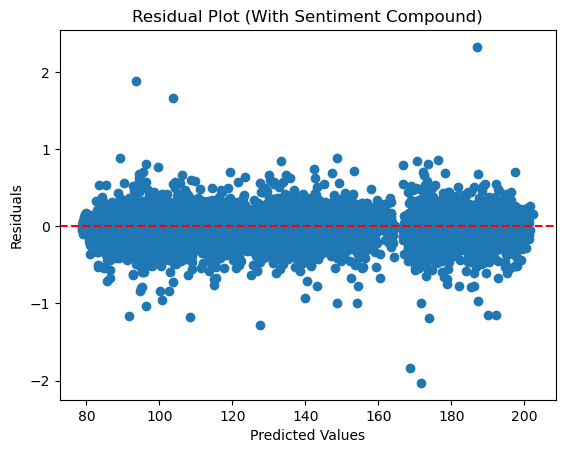


The model seems to be a good fit. The RMSE and R² values for test and cross-validation are similar.


In [3]:
"""
Final model
"""

import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

merged_data = pd.read_csv(r"C:\Users\Zhun Kai\Downloads\merged_stock_news.csv", encoding="latin1")
merged_df = merged_data

# Features and target (now includes the sentiment compound score)
features = merged_df[['open', 'high', 'low', 'volume', 'cleaned_compound']]  # Added 'compound' from sentiment analysis
target = merged_df['close']

# Split dataset into train and test
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=42
)

# Initialize Linear Regression model
regressor = LinearRegression()

# Define custom scoring functions for cross-validation
cv_scoring = {
    'mae_score': 'neg_mean_absolute_error',  # Negative because MAE is minimized
    'mse_score': 'neg_mean_squared_error',  # Negative because MSE is minimized
    'rmse_score': 'neg_root_mean_squared_error',  # RMSE is the square root of MSE
    'r2_score': 'r2'  # R² is maximized, so no negation
}

# Perform Cross-validation (using 5 folds)
cross_val_results = cross_validate(
    regressor, features, target, cv=5, scoring=cv_scoring, return_train_score=True
)

# Calculate mean metrics across folds
mean_mae_cv = -np.mean(cross_val_results['test_mae_score'])  # Negate because MAE is minimized
mean_mse_cv = -np.mean(cross_val_results['test_mse_score'])  # Negate because MSE is minimized
mean_rmse_cv = -np.mean(cross_val_results['test_rmse_score'])  # Negate because RMSE is minimized
mean_r2_cv = np.mean(cross_val_results['test_r2_score'])  # R² is not negated as higher values are better

# Print the cross-validation results
print("=== Cross-Validation Results (With Sentiment Compound) ===")
print(f"Cross-Validation Mean Absolute Error (MAE): {mean_mae_cv}")
print(f"Cross-Validation Mean Squared Error (MSE): {mean_mse_cv}")
print(f"Cross-Validation Root Mean Squared Error (RMSE): {mean_rmse_cv}")
print(f"Cross-Validation R²: {mean_r2_cv}")

# Train the model on the entire training set
regressor.fit(features_train, target_train)

# Make predictions on the test set
target_test_predictions = regressor.predict(features_test)

# Calculate performance metrics for the test set
test_mae = mean_absolute_error(target_test, target_test_predictions)
test_mse = mean_squared_error(target_test, target_test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(target_test, target_test_predictions)

# Print the results for the test set
print("\n=== Test Set Results (With Sentiment Compound) ===")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Test R-squared (R²): {test_r2}")

# Residuals (difference between true and predicted values)
residual_values = target_test - target_test_predictions

# Plot residuals
plt.scatter(target_test_predictions, residual_values)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (With Sentiment Compound)')
plt.show()

# Assess overfitting, underfitting, or good fit based on RMSE and R²
if test_rmse < mean_rmse_cv and test_r2 > mean_r2_cv:
    print("\nThe model might be overfitting. The test RMSE is higher, and test R² is lower than cross-validation.")
elif test_rmse > mean_rmse_cv and test_r2 < mean_r2_cv:
    print("\nThe model might be underfitting. The cross-validation RMSE is higher, and cross-validation R² is lower than test set.")
else:
    print("\nThe model seems to be a good fit. The RMSE and R² values for test and cross-validation are similar.")

In [4]:
"""
Deployment of model
"""

import joblib

# Save the trained Linear Regression model
joblib.dump(regressor, 'linear_regression_model_with_sentiment.pkl')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# Load the trained model and sentiment analyzer
regressor = joblib.load('linear_regression_model_with_sentiment.pkl')
sentiment_analyzer = SentimentIntensityAnalyzer()

# Initialize the summarization pipeline (device=-1 for CPU)
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=-1)

# Function to perform sentiment analysis on a text
def get_sentiment(text):
    sentiment = sentiment_analyzer.polarity_scores(text)
    return sentiment['compound']

# Prediction function
def predict_future_close(open_price, high_price, low_price, volume, sentiment_text):
    # Perform sentiment analysis on the text
    sentiment_score = get_sentiment(sentiment_text)
    
    # Create the feature DataFrame with the sentiment score
    input_data = pd.DataFrame({
        'open': [open_price],
        'high': [high_price],
        'low': [low_price],
        'volume': [volume],
        'cleaned_compound': [sentiment_score]
    })

    # Make prediction using the regressor model
    predicted_close = regressor.predict(input_data)

    return predicted_close[0]

# Function to summarize and analyze sentiment for a given news article
def summarize_and_predict(news_text, open_price, high_price, low_price, volume):
    try:
        # Summarize the news content
        input_length = len(news_text.split())
        adjusted_max_length = max(10, int(input_length * 0.5))  # Ensure at least 10 words in the summary
        summary = summarizer(news_text, min_length=10, max_length=adjusted_max_length, truncation=True)
        summarized_text = summary[0]['summary_text']
        
        # Predict future closing price based on summarized news
        predicted_close = predict_future_close(open_price, high_price, low_price, volume, summarized_text)
        
        return summarized_text, predicted_close
    except Exception as e:
        return f"Error processing the news: {str(e)}", None

Device set to use cpu


In [5]:
"""
Prediction using updated model
"""

news="The newest Annual Passholder magnet featuring Ray from “The Princess and the Frog” is now available at EPCOT. The magnet can be picked up at the Creations Shop in EPCOT from January 21 to February 28, 2025, during regular park hours. A sign outside of the Creations Shop directs guests to the distribution location. Also noted on the sign is that all Passholders must be present to pick up their magnet and should have their Annual Pass and photo ID ready. Cast Members in the shop will then scan the Annual Pass and check the photo ID before handing guests the magnet. The magnet features Ray the firefly from “The Princess and the Frog.” He’s smiling up at Evangeline inside the iconic Walt Disney World “D.” The “D” is blue with various starbursts and dots scattered throughout in yellow and blue. “Walt Disney World” is in white text and “annual passholder” is in black text. In addition to the magnet, Passholders can also enjoy an exclusive Frozen Lavender Lemonade inspired by New Orleans’ influence on American cuisine. The drink combines the tart brightness of lemon with flavors of lavender and is available at Regal Eagle Smokehouse: Craft Drafts & Barbecue in World Showcase."

news_data = {
    'news content': news,
    'open': 150,  # Example open price
    'high': 180,  # Example high price
    'low': 120,   # Example low price
    'volume': 159188  # Example volume
}

# Call the function to summarize and predict
news_text = news_data['news content']
open_price = news_data['open']
high_price = news_data['high']
low_price = news_data['low']
volume = news_data['volume']

# Get summary and predicted close price
summary, predicted_close = summarize_and_predict(news_text, open_price, high_price, low_price, volume)

# Output the results
print("News Summary:", summary)
print(f"Predicted Future Close Price: {predicted_close}")

News Summary:  The magnet can be picked up at the Creations Shop in EPCOT from January 21 to February 28, 2025 . The magnet features Ray the firefly from “The Princess and the Frog” He’s smiling up at Evangeline inside the iconic Walt Disney World “D”
Predicted Future Close Price: 154.31284083744384
